## Классификация постов
Используется три архитектуры нейронных сетей:
- Одномерная сверточная нейросеть
- Рекуррентная нейросеть LSTM
- Рекуррентная нейросеть GRU

In [1]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина поста
max_len = 11
# Количество классов
nb_classes = 15

## Загрузка набора данных

In [3]:
df_em_1_token_10 = pd.read_csv('df_em_1_token_10.csv', sep=";")

In [4]:
df_em_1_token_10

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
0,😂,5,1,smile,positive/negative,0,почему бы и нет 😂
1,😁,5,1,smile,positive/negative,0,как сесть на диету 😁
2,😁,6,1,smile,positive/negative,0,когда в душе ещё щенок 😁
3,😻,6,1,joy,positive,2,новые фотографии нюши просто огненные😻
4,😍,7,1,joy,positive,2,безумно красивая актриса - алина ланина 😍
...,...,...,...,...,...,...,...
9215,😄,5,1,smile,positive/negative,0,ряды эскортниц скоро пополнится 😄
9216,😂,7,1,smile,positive/negative,0,так он прав ты реально даун 😂
9217,🤔,7,1,no_emotion,neutral/skeptical,1,вы же не про меня?🤔
9218,🤔,9,1,no_emotion,neutral/skeptical,1,про кого пошутил то это не до комик🤔


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(df_em_1_token_10, test_size=0.2)

In [7]:
train

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
9042,☺,5,1,smile,positive/negative,0,мне кажется красивый ☺️
5455,😄,6,1,smile,positive/negative,0,надо и это бросить как-то 😄
256,😅,8,1,smile,positive/negative,0,"интересно, принесли ли эти пятерки счастье?😅"
8000,🤣,5,1,smile,positive/negative,0,слой жира на потолке🤣
157,😳,9,1,shame,negative,6,а что так можно? взял и пошел 😳
...,...,...,...,...,...,...,...
7793,😊,9,1,smile,positive/negative,0,да. нашли друг дружку творческие личности! 😊
7842,😁,7,1,smile,positive/negative,0,тогда идите на пуй и управляйте 😁
8560,🥴,8,1,no_emotion,positive/negative,3,как вариант бесконечного обморока для нежного ...
7758,😏,3,1,no_emotion,neutral/skeptical,1,я подумаю 😏


Выделяем данные для обучения

In [8]:
posts = train['clean_text']

In [9]:
posts[:5]

9042                         мне кажется красивый ☺️
5455                     надо и это бросить как-то 😄
256     интересно, принесли ли эти пятерки счастье?😅
8000                           слой жира на потолке🤣
157                  а что так можно? взял и пошел 😳
Name: clean_text, dtype: object

Выделяем правильные ответы

In [10]:
y_train = utils.to_categorical(train['class'], nb_classes)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Токенизация текста

Создаем токенизатор Keras

In [13]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на постах

In [14]:
tokenizer.fit_on_texts(posts)

Просматриваем словарь токенизатора

In [15]:
tokenizer.word_index

{'не': 1,
 'и': 2,
 'в': 3,
 '🤣': 4,
 'а': 5,
 'это': 6,
 'что': 7,
 '😂': 8,
 'на': 9,
 'я': 10,
 '😁': 11,
 'как': 12,
 'у': 13,
 'с': 14,
 'так': 15,
 '😅': 16,
 'то': 17,
 'ты': 18,
 'ну': 19,
 '😄': 20,
 'да': 21,
 'же': 22,
 '🤔': 23,
 'вот': 24,
 'за': 25,
 'все': 26,
 '😊': 27,
 'вы': 28,
 'по': 29,
 'он': 30,
 'тоже': 31,
 '😉': 32,
 'уже': 33,
 '😏': 34,
 '😆': 35,
 'бы': 36,
 'мне': 37,
 'когда': 38,
 'просто': 39,
 'только': 40,
 'из': 41,
 'меня': 42,
 'для': 43,
 'если': 44,
 'есть': 45,
 'она': 46,
 'ещё': 47,
 'кто': 48,
 '😍': 49,
 'там': 50,
 '😎': 51,
 'от': 52,
 '😃': 53,
 'к': 54,
 'спасибо': 55,
 'они': 56,
 'нет': 57,
 'но': 58,
 'очень': 59,
 'можно': 60,
 'тебе': 61,
 'может': 62,
 'без': 63,
 'будет': 64,
 'надо': 65,
 'всё': 66,
 'было': 67,
 '❤': 68,
 'или': 69,
 'тебя': 70,
 '😳': 71,
 'вам': 72,
 'вообще': 73,
 'даже': 74,
 'вас': 75,
 'его': 76,
 'тогда': 77,
 'до': 78,
 'лучше': 79,
 'какой': 80,
 'точно': 81,
 'тут': 82,
 'зачем': 83,
 'где': 84,
 'такой': 85,
 'о':

Преобразуем посты в числовое представление

In [16]:
sequences = tokenizer.texts_to_sequences(posts)

In [18]:
index = 100
print(posts[index])
print(sequences[index])

❤, если здесь не хватает коли
[3207, 288, 1714, 536, 97, 100, 3208, 3209]


In [19]:
tokenizer.word_index['здесь']

203

Ограничиваем длину постов

In [20]:
x_train = pad_sequences(sequences, maxlen=max_len)

In [21]:
x_train[:5]

array([[   0,    0,    0,  129,   17, 1665,  610,   13, 1156,   14, 1666],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1,   25, 3079],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 3080,   32],
       [   0,    0,    0,    0,    0,    5, 1667,    5, 1668, 3081,  148],
       [   0,    0,    0,    0,    0,    0,    0,   95,  363, 1669,  181]],
      dtype=int32)

## Сверточная нейронная сеть

In [22]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_len))
model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(15, activation='softmax'))

In [23]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [24]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 11, 32)            320000    
                                                                 
 conv1d (Conv1D)             (None, 7, 250)            40250     
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               32128     
                                                                 
 dense_1 (Dense)             (None, 15)                1935      
                                                                 
Total params: 394,313
Trainable params: 394,313
Non-trainable params: 0
__________________________________________________

Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model.h5

In [25]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [26]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=15,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/15
52/52 [==============================] - ETA: 0s - loss: 1.7227 - accuracy: 0.6369
Epoch 1: val_accuracy improved from -inf to 0.64228, saving model to best_model_cnn.h5
52/52 [==============================] - 18s 165ms/step - loss: 1.7227 - accuracy: 0.6369 - val_loss: 1.3312 - val_accuracy: 0.6423
Epoch 2/15
52/52 [==============================] - ETA: 0s - loss: 1.2012 - accuracy: 0.6491
Epoch 2: val_accuracy improved from 0.64228 to 0.66667, saving model to best_model_cnn.h5
52/52 [==============================] - 4s 68ms/step - loss: 1.2012 - accuracy: 0.6491 - val_loss: 1.1041 - val_accuracy: 0.6667
Epoch 3/15
52/52 [==============================] - ETA: 0s - loss: 0.8687 - accuracy: 0.7252
Epoch 3: val_accuracy improved from 0.66667 to 0.72358, saving model to best_model_cnn.h5
52/52 [==============================] - 3s 64ms/step - loss: 0.8687 - accuracy: 0.7252 - val_loss: 1.0069 - val_accuracy: 0.7236
Epoch 4/15
52/52 [==============================] - ETA: 0s

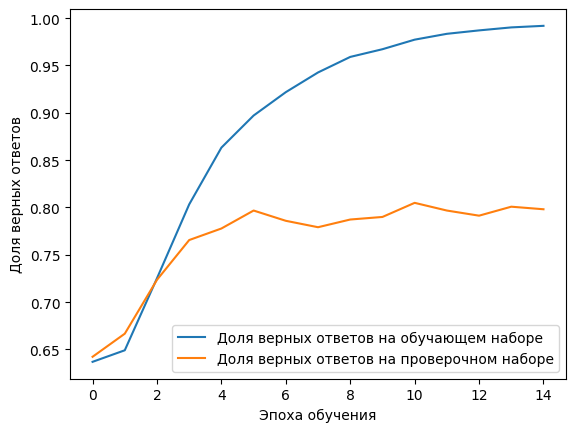

In [27]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть LSTM

In [28]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_len))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(15, activation='softmax'))

In [29]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [30]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 11, 32)            320000    
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 15)                255       
                                                                 
Total params: 323,391
Trainable params: 323,391
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model.h5

In [31]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [32]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=15,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/15
52/52 [==============================] - ETA: 0s - loss: 2.3945 - accuracy: 0.6092
Epoch 1: val_accuracy improved from -inf to 0.64228, saving model to best_model_lstm.h5
52/52 [==============================] - 10s 137ms/step - loss: 2.3945 - accuracy: 0.6092 - val_loss: 1.6552 - val_accuracy: 0.6423
Epoch 2/15
52/52 [==============================] - ETA: 0s - loss: 1.4339 - accuracy: 0.6485
Epoch 2: val_accuracy did not improve from 0.64228
52/52 [==============================] - 3s 54ms/step - loss: 1.4339 - accuracy: 0.6485 - val_loss: 1.3245 - val_accuracy: 0.6423
Epoch 3/15
52/52 [==============================] - ETA: 0s - loss: 1.2373 - accuracy: 0.6485
Epoch 3: val_accuracy did not improve from 0.64228
52/52 [==============================] - 2s 31ms/step - loss: 1.2373 - accuracy: 0.6485 - val_loss: 1.1938 - val_accuracy: 0.6423
Epoch 4/15
52/52 [==============================] - ETA: 0s - loss: 1.0797 - accuracy: 0.6532
Epoch 4: val_accuracy improved from 0.6422

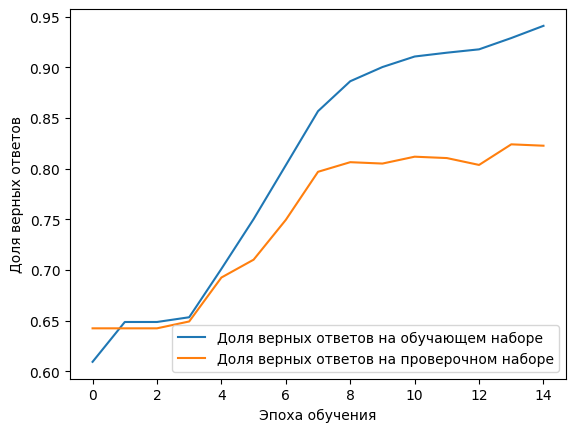

In [33]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Cеть GRU

In [34]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_len))
model_gru.add(GRU(16))
model_gru.add(Dense(15, activation='softmax'))

In [35]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [36]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 11, 32)            320000    
                                                                 
 gru (GRU)                   (None, 16)                2400      
                                                                 
 dense_3 (Dense)             (None, 15)                255       
                                                                 
Total params: 322,655
Trainable params: 322,655
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model_gru.h5

In [37]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [38]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=15,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/15
51/52 [============================>.] - ETA: 0s - loss: 2.4374 - accuracy: 0.6036
Epoch 1: val_accuracy improved from -inf to 0.64228, saving model to best_model_gru.h5
52/52 [==============================] - 7s 96ms/step - loss: 2.4274 - accuracy: 0.6041 - val_loss: 1.7151 - val_accuracy: 0.6423
Epoch 2/15
52/52 [==============================] - ETA: 0s - loss: 1.3806 - accuracy: 0.6485
Epoch 2: val_accuracy did not improve from 0.64228
52/52 [==============================] - 4s 69ms/step - loss: 1.3806 - accuracy: 0.6485 - val_loss: 1.2698 - val_accuracy: 0.6423
Epoch 3/15
52/52 [==============================] - ETA: 0s - loss: 1.1611 - accuracy: 0.6546
Epoch 3: val_accuracy improved from 0.64228 to 0.66667, saving model to best_model_gru.h5
52/52 [==============================] - 2s 37ms/step - loss: 1.1611 - accuracy: 0.6546 - val_loss: 1.0797 - val_accuracy: 0.6667
Epoch 4/15
52/52 [==============================] - ETA: 0s - loss: 0.9194 - accuracy: 0.7528
Epoch 

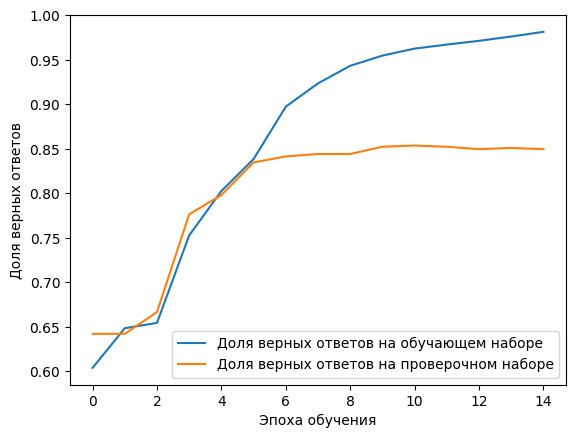

In [39]:
plt.plot(history_gru.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_gru.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Загружаем набор данных для тестирования


In [10]:
test

,img_emoji,word_count,count_emoji,emotion,tonality,class,clean_text
2201,🤣,2,1,smile,positive/negative,0,япошка 🤣
8558,😄,5,1,smile,positive/negative,0,не берите в голову 😄
7703,🙃,5,1,smile,positive/negative,0,сколько квартира стоит? 🙃
7313,😁,8,1,smile,positive/negative,0,пишитепосоветую. их есть у меня😁
5633,😂,8,1,smile,positive/negative,0,странно что ты балуешься с такими фотками 😂
...,...,...,...,...,...,...,...
1720,💣,3,1,surprise,positive/negative,9,нереальные пушки 💣
3793,🤣,4,1,smile,positive/negative,0,и то правда🤣
2949,😂,4,1,smile,positive/negative,0,яндекс такси заказали😂
9082,😊,6,1,smile,positive/negative,0,вы наверное скучно живёте ...😊


Преобразуем посты в числовое представление

Нужно использовать токенизатор, обученный на наборе данных train.

In [41]:
test_sequences = tokenizer.texts_to_sequences(test['clean_text'])

In [42]:
x_test = pad_sequences(test_sequences, maxlen=max_len)

In [43]:
x_test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    7,   14,  401],
       [   0,    0,    0,    0,    0,    9, 6369,  179, 2259,   15,  116],
       [   0,    0,    0,  376,    1,  147,   48,    5,  147,   48, 2222],
       [   0,    0,    0,    0,    0,    0,   12,  591,   38,  117,   14],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

Правильные ответы

In [44]:
y_test = utils.to_categorical(test['class'], nb_classes)

In [45]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Оцениваем качество работы сети на тестовом наборе данных


### Одномерная сверточная сеть

In [46]:
model_cnn.load_weights(model_cnn_save_path)

In [47]:
model_cnn.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 3ms/step - loss: 1.3582 - accuracy: 0.8048


[1.3581902980804443, 0.8047722578048706]

### Сеть LSTM

In [48]:
model_lstm.load_weights(model_lstm_save_path)

In [49]:
model_lstm.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 3ms/step - loss: 0.7813 - accuracy: 0.8124


[0.7812584638595581, 0.812364399433136]

### Сеть GRU

In [50]:
model_gru.load_weights(model_gru_save_path)

In [51]:
model_gru.evaluate(x_test, y_test, verbose=1)

58/58 [==============================] - 0s 3ms/step - loss: 0.7046 - accuracy: 0.8449


[0.7045610547065735, 0.8449023962020874]

In [56]:
test['clean_text'][592]
#test['clean_text'][1246]

'что с ней произошло😱'

In [57]:
#test['class'][2384], test['emotion'][2384], test['tonality'][2384]
test['class'][592], test['emotion'][592], test['tonality'][592]

(5, 'fear', 'negative')

In [58]:
#text = test['clean_text'][2384]
text = test['clean_text'][592]

In [59]:
sequence = tokenizer.texts_to_sequences([text])

In [60]:
sequence

[[7, 14, 401]]

In [61]:
data = pad_sequences(sequence, maxlen=max_len)

In [62]:
data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   7,  14, 401]],
      dtype=int32)

In [63]:
emoji_dict = {"0":"smile positive/negative", "1":"no_emotion neutral/skeptical", "2":"joy positive",
              "3":"no_emotion positive/negative", "4":"sadness negative", "5":"fear negative",
              "6":"shame negative","7":"anger negative", "8":"disgust negative",
              "9":"surprise positive/negative","10":"disgust neutral/skeptical", "11":"surprise negative",
              "12":"no_emotion negative","13":"sadness positive/negative", "14":"fear positive/negative"}

### Одномерная сверточная сеть

In [64]:
result_cnn = model_cnn.predict(data)

1/1 [==============================] - 0s 125ms/step


In [65]:
result_cnn

array([[9.1012061e-01, 4.1911963e-04, 1.4316806e-03, 1.3224878e-03,
        3.9770102e-04, 3.8937498e-02, 1.5198323e-04, 1.1942961e-02,
        5.9269937e-03, 1.7198537e-02, 3.7591467e-03, 5.1403032e-03,
        1.2215452e-03, 1.7111711e-03, 3.1825941e-04]], dtype=float32)

### Сеть LSTM

In [66]:
result_lstm = model_lstm.predict(data)

1/1 [==============================] - 0s 338ms/step


In [67]:
result_lstm

array([[0.4432266 , 0.11757785, 0.02944975, 0.12681894, 0.17904927,
        0.02279827, 0.00580656, 0.00370822, 0.02227179, 0.02333146,
        0.00814903, 0.00567542, 0.00607363, 0.00170964, 0.00435358]],
      dtype=float32)

### Сеть GRU

In [68]:
result_gru = model_gru.predict(data)

1/1 [==============================] - 0s 318ms/step


In [69]:
result_gru

array([[0.21596836, 0.56819886, 0.04287174, 0.08575201, 0.03044496,
        0.01650184, 0.00424139, 0.00324067, 0.00440068, 0.00465925,
        0.0051929 , 0.00680412, 0.00237077, 0.00617134, 0.00318112]],
      dtype=float32)